In [1]:
#importing some useful packages
#import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt
import glob



(720, 1280, 3)


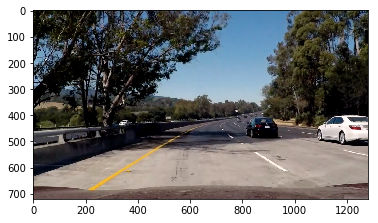

In [2]:
# ## Read in an Image

#image = mpimg.imread('test_images/straight_lines1.jpg')
image = mpimg.imread('test_images/test5.jpg')
'''['test1.jpg',
 'test2.jpg',
 'test5.jpg',
 'test4.jpg',
 'straight_lines2.jpg',
 'test6.jpg',
 'straight_lines1.jpg',
 'test3.jpg']'''
plt.imshow(image)
print(image.shape)
plt.show()

In [3]:
# ## Test Images

import os
test_imgs = os.listdir("test_images/")
#test_imgs


In [4]:
## for displaying mutiple images on matplot.
def display_multiple_img(img_list, labels=[],cols=2, fig_size=(15,15)):
    total = len(img_list)
    rows = total / cols
    plt.figure(figsize=fig_size)
    for i in range(len(img_list)):
        plt.subplot(rows, cols, i+1)
        if len(labels) > 0:
            plt.title(labels[i])
        plt.imshow(img_list[i])
        
    #plt.tight_layout()
    plt.show()

In [5]:
## scanning through images in test_image folder
#img_list = [mpimg.imread("test_images/" + name) for name in test_imgs]
#display_multiple_img(img_list, test_imgs)


In [6]:
# CAMERA CALIBRATION

##prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
#print(objp[:,:2])

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
img_size=[]
images = glob.glob('camera_cal/calibration*.jpg')
    
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    #print(img.shape)

    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
 
     # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

     # If found, add object points, image points
    if ret == True:
       objpoints.append(objp)
       imgpoints.append(corners)
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
#print ("ret, mtx, dist, rvecs, tvecs - ")


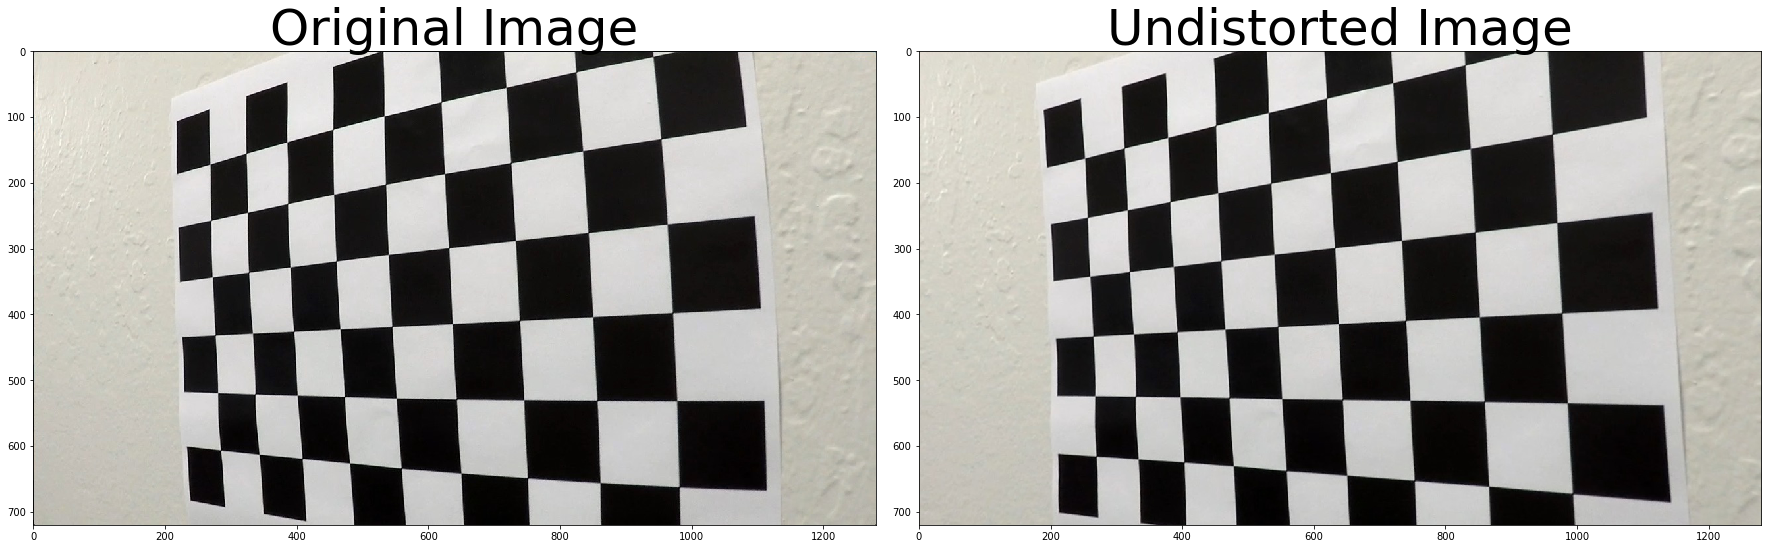

In [7]:
## IMAGE UNDISTORTION 

img = mpimg.imread('camera_cal/calibration4.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)

#plt.imshow(img)
#plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



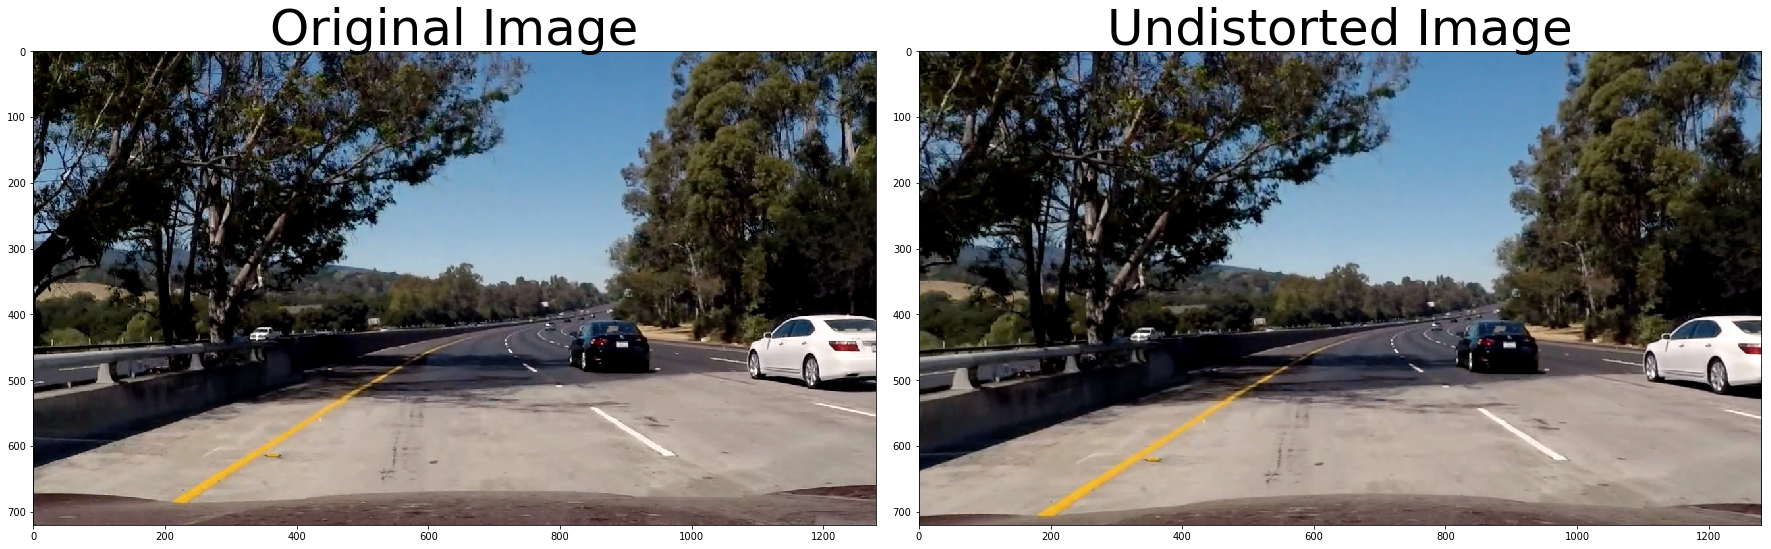

In [8]:
##img = mpimg.imread('camera_cal/calibration4.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)

#plt.imshow(img)
#plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [9]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

In [10]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

In [11]:
# COLOR AND GRADIENT THRESHOLDING

def color_gradient_Threshold(img):

    img = np.copy(undist)
    
    ## Color Threshold ##
    
    # Separate the R&G channel
    R = img[:,:,0]
    G = img[:,:,1]
    thresh = (150, 255)
    r_g_binary = np.zeros_like(R)
    r_g_binary[((R > thresh[0]) & (R <= thresh[1])) & ((G > thresh[0]) & (G <= thresh[1]))] = 1


    # Convert to HLS color space and separate the S channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    #plt.imshow(hls)
    #s_thresh = (90, 255)
    s_thresh=(120, 255)
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
  
    combined_c = np.zeros_like(s_binary)
    combined_c[(s_binary == 1) & (r_g_binary == 1)] = 1

    ## Gradient x and dierction ##
    
    # Threshold x gradient
    gradx_binary = abs_sobel_thresh(img, orient='x', thresh_min=20, thresh_max=100)
    
    # Threshold Direction of Gradient
    #dir_binary = dir_threshold(img, thresh=(0.7, 1.3))
    dir_binary = dir_threshold(img, thresh=(np.pi/6, np.pi/2))
    
    combined_g = np.zeros_like(dir_binary)
    combined_g[(gradx_binary == 1) & (dir_binary == 1)] = 1
    
            
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(s_binary), combined_g, combined_c))
    
    ## combining -> combined_g & combined_c 
    mask = np.zeros_like(s_binary)
    mask[(combined_g == 1) | (combined_c == 1)] = 1

    return color_binary,mask



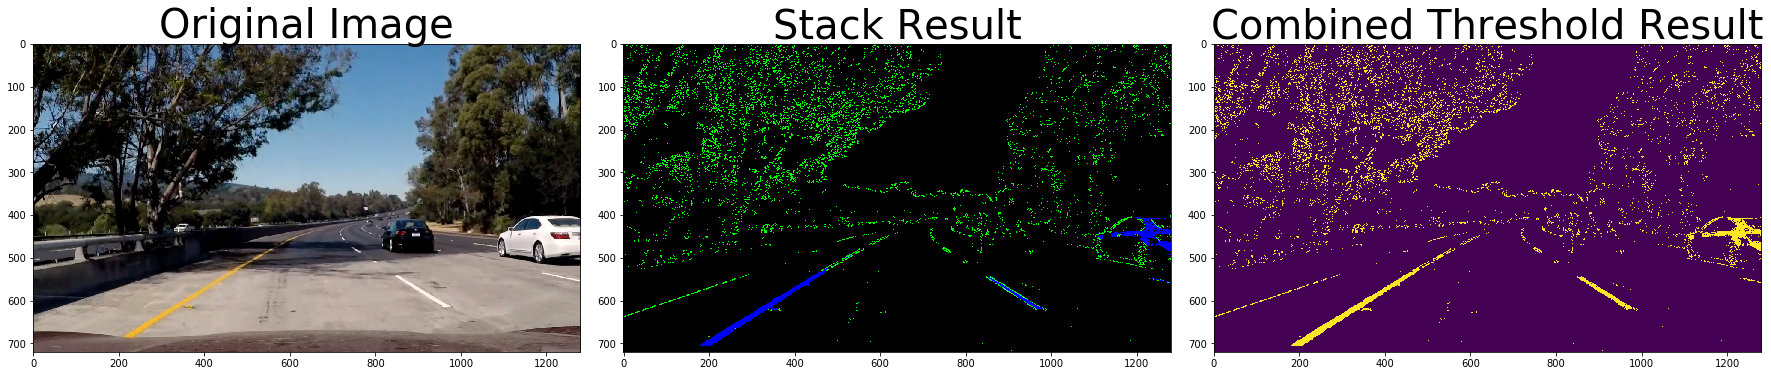

In [12]:
#ndist = cv2.undistort(image, mtx, dist, None, mtx)    
result1,result2 = color_gradient_Threshold(undist)

## Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result1)
ax2.set_title('Stack Result', fontsize=40)

ax3.imshow(result2)
ax3.set_title('Combined Threshold Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [13]:
## PERSPECTIVE TRANSFORM

'''def warpPerspective(img):
    
    height = img.shape[0]
    width = img.shape[1]

    # Coordinates in the source image
    #s1 = [width // 2 - 76, height * 0.625] ##tl
    #s2 = [width // 2 + 76, height * 0.625]  ##tr
    #s3 = [-100, height]                ## bl
    #s4 = [width + 100, height]         ## br   
    #s1 = [100,height]
    #s2 = [width-100,height]
    #s3 = [width//2 + 50, height//2]
    #s4 = [width//2 - 50, height//2]
    s1 = [width//2 - 70, height*0.625]
    s2 = [width//2 + 70, height*0.625]
    #s3 = [-70,height]
    #s4 = [width+70,height]
    s3 = [-100,height]
    s4 = [width+100,height]
    src = np.float32([s1, s2, s3, s4])
    
    # Coordinates in the destination image
    d1 = [100, 0]
    d2 = [width - 100, 0]
    d3 = [100, height]
    d4 = [width - 100, height]
    #d1 = [50, height]
    #d2 = [width - 50, height]
    #d3 = [width - 50, 0]
    #d4 = [50, 0]
    #d1 = [50, 0]
    #d2 = [width - 50, 0]
    #d3 = [50, height]
    #d4 = [width - 50, height]
    dst = np.float32([d1, d2, d3, d4])
    # Given src and dst points we calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    print("src -" ,src)
    print("dst -" ,dst)
    # Warp the image
    warped = cv2.warpPerspective(img, M, (width, height), flags=cv2.INTER_LINEAR)
    return warped,M


#top_down, perspective_M = warpPerspective(undist)
top_down,M = warpPerspective(result2)
#plt.imshow(top_down)

## Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undist)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(top_down)
ax2.set_title('Wraped', fontsize=40)'''


'def warpPerspective(img):\n    \n    height = img.shape[0]\n    width = img.shape[1]\n\n    # Coordinates in the source image\n    #s1 = [width // 2 - 76, height * 0.625] ##tl\n    #s2 = [width // 2 + 76, height * 0.625]  ##tr\n    #s3 = [-100, height]                ## bl\n    #s4 = [width + 100, height]         ## br   \n    #s1 = [100,height]\n    #s2 = [width-100,height]\n    #s3 = [width//2 + 50, height//2]\n    #s4 = [width//2 - 50, height//2]\n    s1 = [width//2 - 70, height*0.625]\n    s2 = [width//2 + 70, height*0.625]\n    #s3 = [-70,height]\n    #s4 = [width+70,height]\n    s3 = [-100,height]\n    s4 = [width+100,height]\n    src = np.float32([s1, s2, s3, s4])\n    \n    # Coordinates in the destination image\n    d1 = [100, 0]\n    d2 = [width - 100, 0]\n    d3 = [100, height]\n    d4 = [width - 100, height]\n    #d1 = [50, height]\n    #d2 = [width - 50, height]\n    #d3 = [width - 50, 0]\n    #d4 = [50, 0]\n    #d1 = [50, 0]\n    #d2 = [width - 50, 0]\n    #d3 = [50, hei

In [14]:
## PERSPECTIVE TRANSFORM

def warpPerspective(img):
    
    height = img.shape[0]
    width = img.shape[1]

    # Coordinates in the source image
    src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    
    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    #print("src -" ,src)
    #print("dst -" ,dst)

    # Given src and dst points we calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image
    warped = cv2.warpPerspective(img, M, (width, height), flags=cv2.INTER_LINEAR)
    return warped,M


Text(0.5,1,'Wraped')

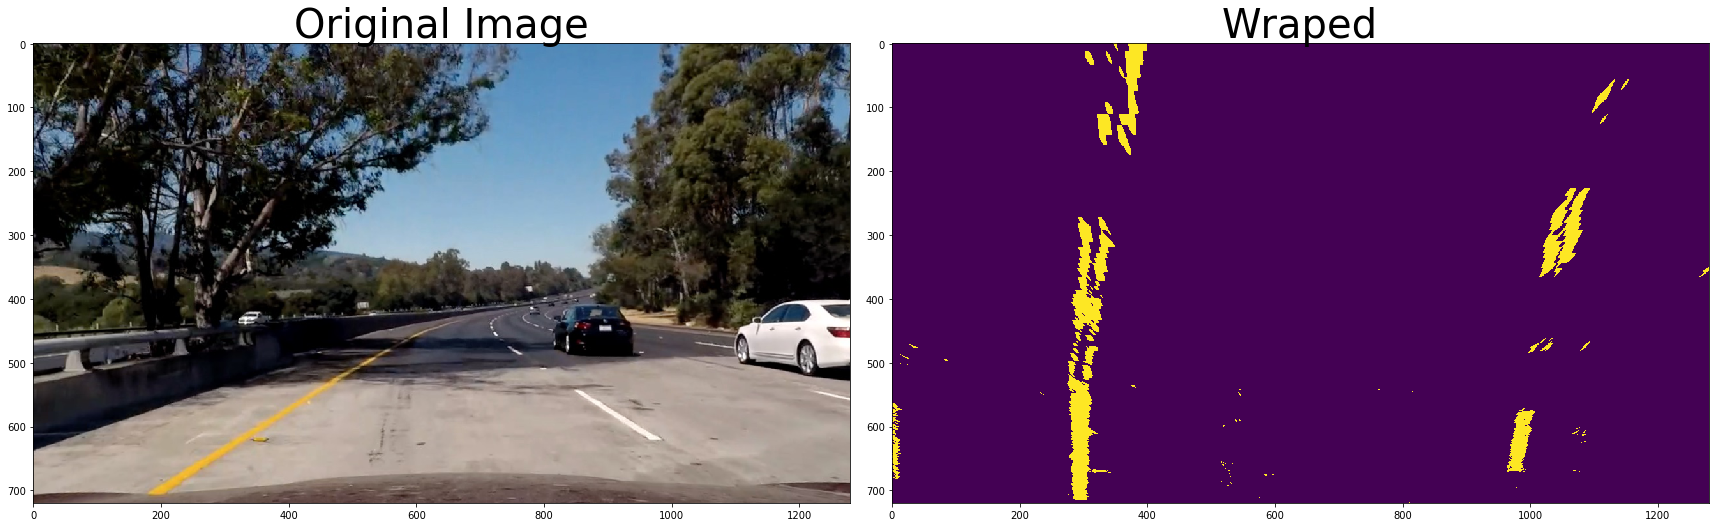

In [15]:

#top_down, perspective_M = warpPerspective(undist)
top_down,M = warpPerspective(result2)
#plt.imshow(top_down)

## Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undist)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(top_down)
ax2.set_title('Wraped', fontsize=40)

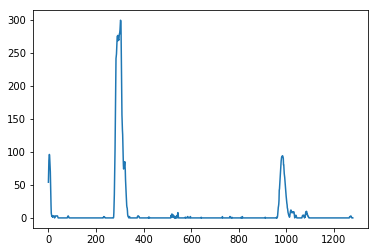

In [16]:
#### HISTOGRAM

# Create histogram of image binary activations
#binary_warped = cv2.cvtColor(top_down, cv2.COLOR_RGB2GRAY)
#histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
#binary_warped = cv2.cvtColor(top_down, cv2.COLOR_RGB2GRAY)
def find_histogram(top_down):
    
    histogram = np.sum(top_down[top_down.shape[0]//2:,:], axis=0)

#histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines below.
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    return histogram, midpoint, leftx_base, rightx_base

# Visualize the resulting histogram
histogram, midpoint, leftx_base, rightx_base = find_histogram(top_down)
plt.plot(histogram)

In [17]:
#### LANE PIXEL DETECTION & CURVE FITTING 

In [18]:
### STEP -1 : SLIDING WINDOW

def find_lane_pixels(binary_warped, midpoint, leftx_base, rightx_base):
    
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
   
    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    #print(window_height)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    #print(nonzero)
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        #print(win_y_low, binary_warped.shape[0], (window+1)*window_height)
        win_y_high = binary_warped.shape[0] - window*window_height
        #print(win_y_high, binary_warped.shape[0], window*window_height)
        
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
                
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        plt.imshow(out_img)
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
  
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        #print(good_left_inds , len(good_left_inds))
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    #print(leftx, lefty, rightx, righty)
    #plt.imshow(out_img)
    return leftx, lefty, rightx, righty, out_img


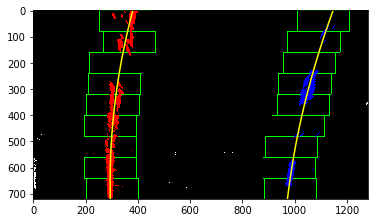

In [19]:


def fit_polynomial(binary_warped, midpoint, leftx_base, rightx_base):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped, midpoint, leftx_base, rightx_base)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    #print (left_fit)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0] 
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    #print(left_fit, right_fit)
    return out_img,left_fit, right_fit


out_img, left_fit, right_fit = fit_polynomial(top_down, midpoint, leftx_base, rightx_base)
plt.imshow(out_img)

In [20]:
### STEP - 2 : SEARCH FROM PRIOR

In [21]:

# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
#left_fit = np.array([ 2.13935315e-04, -3.77507980e-01,  4.76902175e+02])
#right_fit = np.array([4.17622148e-04, -4.93848953e-01,  1.11806170e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    #print(type(left_fit))
    right_fit = np.polyfit(righty, rightx, 2)
    #print(right_fit)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

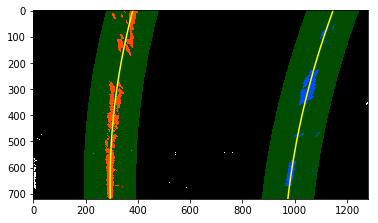

In [22]:
def search_around_poly(binary_warped,left_fit, right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    #print(binary_warped.shape)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    #print(" left_fit, right_fit", left_fit, right_fit)
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    #print(left_lane_inds)
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)

    ## Visualization ##
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)

    #plt.imshow(window_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    #print(left_line_window1)
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    #print(left_line_window2)
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    #print("4", left_line_pts)
    
    
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    #print("5", right_line_pts)
    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    #plt.imshow(result)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result, left_fit, right_fit, left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result, left_fit, right_fit, left_fitx, right_fitx = search_around_poly(top_down, left_fit, right_fit)

# View your output
plt.imshow(result)



In [23]:
## COMPUTING RADIUS OF CURVATURE & VEHICLE POSTION

def generate_data(ym_per_pix, xm_per_pix,leftx,rightx):

    ploty = np.linspace(0, 719, 720)# to cover same y-range as image
 
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    return ploty, left_fit_cr, right_fit_cr

    
def measure_curvature_real(left_fitx, right_fitx):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    #ym_per_pix =15/720
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    #xm_per_pix = 3.7/685 # meters per pixel in x dimension

    ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix,left_fitx,right_fitx)
    
    
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    #print(left_curverad)
    return left_curverad, right_curverad



def get_vehicle_position(img_shape, left_fitx, right_fitx):
    xm_per_pix = 3.7 / 700  # meters per pixel in x dimension
    #xm_per_pix = 3.7 / 685  # meters per pixel in x dimension

    lane_center = (left_fitx[719] + right_fitx[719])/2
    #print("lane_center", lane_center)
    
    
    midpoint = img_shape // 2
    #center_of_lanes = (right_lane_pos + left_lane_pos) / 2
    
    # Calculate position based on midpoint - center of lanes distance
    position = midpoint - lane_center

    # Get value in meters
    real_position = position * xm_per_pix

    return real_position


Radius of curvature: 871.79 m
offset from center 0.0300133177347


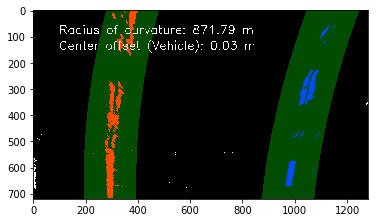

In [24]:

# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad = measure_curvature_real(left_fitx, right_fitx)

#print("left_curverad, right_curverad", left_curverad, right_curverad)
average_curve_rad = (left_curverad + right_curverad)/2
curvature_string = "Radius of curvature: %.2f m" % average_curve_rad
print(curvature_string)
curvature_string = "Radius of curvature: %.2f m" % average_curve_rad
cv2.putText(result,curvature_string , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)



real_position = get_vehicle_position(image.shape[1], left_fitx, right_fitx)
print ("offset from center",real_position)
offset_string = "Center offset (Vehicle): %.2f m" % real_position
cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
plt.imshow(result)

In [25]:
# PROCESSING VIDEO

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [26]:
left_fit1 = []
right_fit1 = []

#print(left_fit1,right_fit1)

def process_image(image):
    
    global left_fit1
    global right_fit1
    
    undist = cv2.undistort(image, mtx, dist, None, mtx)  
    result1,result2 = color_gradient_Threshold(undist)
    top_down,M = warpPerspective(result2)
    histogram, midpoint, leftx_base, rightx_base = find_histogram(top_down)
    #print(left_fit1,right_fit1)
    if (len(left_fit1)==0 & len(right_fit1)==0):
        out_img, left_fit, right_fit = fit_polynomial(top_down, midpoint, leftx_base, rightx_base)
        left_fit1 = left_fit
        right_fit1 = right_fit
        result = out_img
    else:
        result1, left_fit, right_fit, left_fitx, right_fitx = search_around_poly(top_down, left_fit1, right_fit1)
        left_fit1 = left_fit
        right_fit1 = right_fit
        result = result1
        
         # Calculate the radius of curvature in meters for both lane lines
        left_curverad, right_curverad = measure_curvature_real(left_fitx, right_fitx)
        average_curve_rad = (left_curverad + right_curverad)/2
        curvature_string = "Radius of curvature: %.2f m" % average_curve_rad
        cv2.putText(result,curvature_string , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)

        real_position = get_vehicle_position(image.shape[1], left_fitx, right_fitx)
        offset_string = "Center offset (Vehicle): %.2f m" % real_position
        cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
    return result

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 99%|█████████▉| 125/126 [00:23<00:00,  4.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 19.9 s, sys: 267 ms, total: 20.1 s
Wall time: 24.3 s


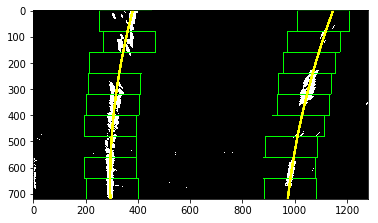

In [27]:

project_video_output = 'project_video_output.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds

clip1 = VideoFileClip("project_video.mp4").subclip(0,5)

project_video = clip1.fl_image(process_image) #NOTE: this function expects color images!!
get_ipython().run_line_magic('time', 'project_video.write_videofile(project_video_output, audio=False)')

In [29]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_video_output))
